# **Linear Regression Model for Bike Sharing Dataset**
- This Colab notebook implements a Linear Regression model to predict bike rental counts based on various features from the Bike Sharing Dataset.

**Dataset Description:**

- The dataset contains hourly aggregated data on bike sharing counts, including information such as season, weather conditions, temperature, humidity, and wind speed.
The target variable is the count of total rental bikes.
Model Overview:

- The Linear Regression model is trained using the Scikit-learn library.

**Model Evaluation:**

- The performance of the model is evaluated using Mean Absolute Error (MAE) and Mean Squared Error (MSE) metrics.
Actual vs. predicted values are plotted to visualize the model's performance.

**Results**

- MAE (Mean Absolute Error): [104]
- MSE (Mean Squared Error): [19279]



In [1]:
from google.colab import files


uploaded = files.upload()

Saving day.csv to day.csv
Saving hour.csv to hour.csv


2. **Data Loading and reading**

In [96]:
# Importing necessary libraries
import pandas as pd
import io
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Reading the CSV files
# 'day.csv' contains aggregated bike sharing counts on a daily basis
# 'hour.csv' contains aggregated bike sharing counts on an hourly basis
day_data = pd.read_csv(io.BytesIO(uploaded['day.csv']))
hour_data = pd.read_csv(io.BytesIO(uploaded['hour.csv']))

# Displaying the shape of the hour dataset
hour_data.shape


(17379, 17)

3. **Data conversion to dataframe objects**

In [97]:
# Converting data to DataFrame objects
# Creating DataFrame objects for day_data and hour_data
dataframe_day = pd.DataFrame(day_data)
dataframe_hour = pd.DataFrame(hour_data)

# Displaying the first row of the day DataFrame
dataframe_day.head(1)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


4. Check for missing values in the dataframe_day DataFrame

In [98]:
# The isnull() method checks each cell of the DataFrame for missing values and returns a DataFrame of boolean values where True indicates a missing value
# The sum() method is then used to sum up the number of missing values for each column
dataframe_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Similarly here

In [99]:
# The isnull() method checks each cell of the DataFrame for missing values and returns a DataFrame of boolean values where True indicates a missing value
# The sum() method is then used to sum up the number of missing values for each column
dataframe_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

6. **Data Cleaning** - Removing the unnecessary columns

In [16]:
#Removing the unnecessary columns
dataframe_hour.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)
dataframe_day.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

7. Split the dataset into features (data_train) and the target variable (output_train)

In [36]:
# Split the dataset into features (data_train) and the target variable (output_train)
data_train = dataframe_hour.drop('cnt', axis=1)
output_train = dataframe_hour['cnt']

8. Splitting the data for train and test

In [77]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_train, output_train, test_size=0.1)

9. Training the Linear Regression model on the training data

In [100]:
# Importing necessary libraries
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

# Creating a Linear Regression model
regression_model = LinearRegression()

# Training the Linear Regression model on the training data
regression_model.fit(X_train, y_train)

# Performing cross-validation predictions
# The cross_val_predict function performs cross-validation and returns the predicted values for each sample
# The cv parameter specifies the number of folds for cross-validation (here, cv=10 indicates 10-fold cross-validation)
predicted = cross_val_predict(regression_model, X_train, y_train, cv=10)


10. Making the predictions based on the model.

In [93]:
# Make predictions
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)
y_pred

array([271.05822446, 218.88443665, 131.44997743, ..., -30.50768389,
        18.97842209, 142.89207118])

11. Generating the evaluation from the model.

In [94]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute Mean Squared Error (MSE)

# Compute Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Compute R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R2 Score:", mae)

Root Mean Squared Error: 138.8500826111068
Mean Absolute Error: 104.39747043532824
R2 Score: 104.39747043532824


Plotting the graph of actual vs the predicted values Of Dataset

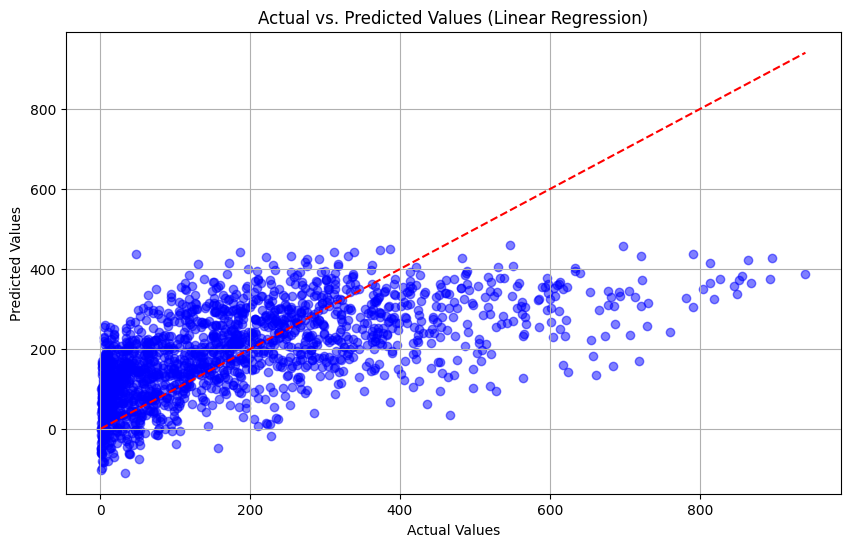

In [95]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.grid(True)
plt.show()
